In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
sns.set(style="white", color_codes=True)


## 1. Data Wrangling

In [2]:
data = pd.read_csv('./stocknews/combined_reddit_dj_2008_2020.csv')
data.shape

(3078, 3)

In [3]:
print('We collected data from {} to {}'.format(data.Date.min(), data.Date.max()))

We collected data from 2008-02-07 to 2020-04-30


In [4]:
#Extract year, month and weeknumber
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Week'] = pd.DatetimeIndex(data['Date']).weekday

In [6]:
data.head(5)

,Date,Headlines,Label,Year,Month,Week
0,2008-02-07,Australia released grisly surveillance picture...,Down,2008,2,3
1,2008-02-08,"""They said when--not if--martial law is declar...",Up,2008,2,4
2,2008-02-11,"U.S. bombing in Iraq massacring civilians, cre...",Down,2008,2,0
3,2008-02-12,BBC cover Anonymous Scientology Protests!. Aus...,Down,2008,2,1
4,2008-02-13,Gang-Rape Victim Says She and 38 Others Silenc...,Down,2008,2,2


In [7]:
### Add sentiment from headlines
sentiment_data = pd.read_csv('./stocknews/sentiment_2008_2020.csv')
print(sentiment_data.shape)
sentiment_data.head(3)

(3078, 12)


,Date,Movement,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust,Negative,Positive
0,2008-02-07,0,6,10,3,9,5,5,2,9,10,12
1,2008-02-08,1,10,2,2,14,3,7,5,7,15,11
2,2008-02-11,0,13,6,4,15,5,12,5,9,16,12


In [14]:
#Combine two dataframes
data_ = pd.merge(data, sentiment_data, on='Date')
data_ = data_.drop(columns=['Label','Date','Headlines'],axis=1)
data_.head(5)

,Year,Month,Week,Movement,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust,Negative,Positive
0,2008,2,3,0,6,10,3,9,5,5,2,9,10,12
1,2008,2,4,1,10,2,2,14,3,7,5,7,15,11
2,2008,2,0,0,13,6,4,15,5,12,5,9,16,12
3,2008,2,1,0,8,6,3,8,3,4,4,7,13,10
4,2008,2,2,0,6,7,5,11,6,7,4,10,15,11


In [15]:
data_.isnull().sum()#no missing value

Year            0
Month           0
Week            0
Movement        0
Anger           0
Anticipation    0
Disgust         0
Fear            0
Joy             0
Sadness         0
Surprise        0
Trust           0
Negative        0
Positive        0
dtype: int64

In [9]:
data_.groupby('Movement').size()

Movement
0    1660
1    1418
dtype: int64

In [11]:
#Change Year, Month, Week, Day to category
def change_category(column):
    data_[column] = data_[column].astype('category')
for i in ['Movement','Year','Month','Week']:
    change_category(i)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27263890>,
      dtype=object)

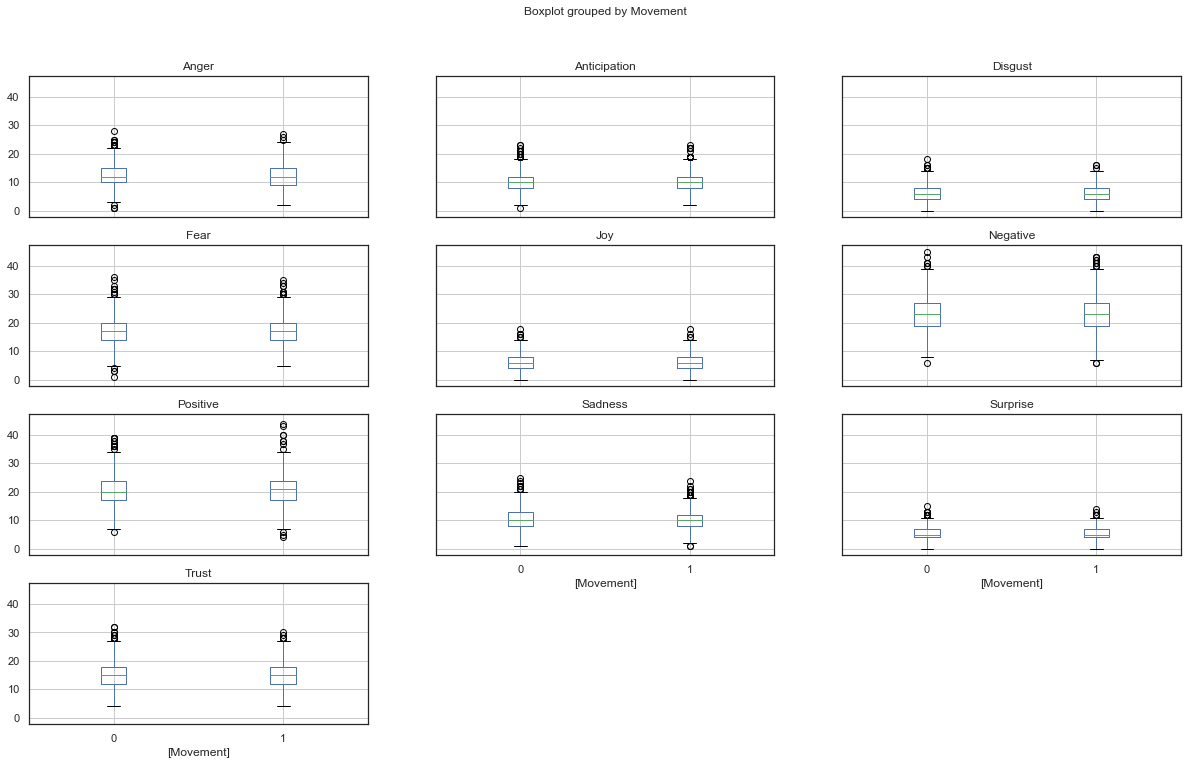

In [12]:
#Detect outliers
data_copy = data_.copy()
data_copy[['Movement']+['Anger','Anticipation','Disgust',\
                 'Fear','Joy','Sadness','Surprise','Trust','Negative','Positive']]\
.boxplot(by="Movement", figsize=(20, 12))

In [17]:
#Many outliers are detected and imputed by median value
def impute_outlier(column):
    q1 = data_[column].quantile(0.25)
    q3 = data_[column].quantile(0.75)
    median = data_[column].quantile(0.5)
    iqr = q3-q1
    data_[column] = np.where(data_[column] > (q3+1.5*iqr), median, data_[column])
    data_[column] = np.where(data_[column]< (q1-1.5*iqr), median, data_[column])
    

In [19]:
columns_impute = ['Anger','Anticipation','Disgust',\
                 'Fear','Joy','Sadness','Surprise','Trust','Negative','Positive']
for i in columns_impute:
    impute_outlier(i)
    

In [20]:
data_.describe()

,Year,Month,Week,Movement,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust,Negative,Positive
count,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.00000,3078.000000,3078.000000,3078.000000
mean,2013.717349,6.480507,2.020143,0.460689,12.213775,9.992853,6.120208,17.046784,6.270305,10.222547,5.24204,15.068551,23.220273,20.566602
std,3.543137,3.427144,1.399980,0.498533,3.867371,3.175909,2.704101,4.658059,2.568471,3.519598,2.19660,4.220850,5.709369,5.321080
min,2008.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,5.000000,0.000000,1.000000,0.00000,4.000000,7.000000,7.000000
25%,2011.000000,3.000000,1.000000,0.000000,9.000000,8.000000,4.000000,14.000000,4.000000,8.000000,4.00000,12.000000,19.000000,17.000000
50%,2014.000000,6.000000,2.000000,0.000000,12.000000,10.000000,6.000000,17.000000,6.000000,10.000000,5.00000,15.000000,23.000000,21.000000
75%,2017.000000,9.000000,3.000000,1.000000,15.000000,12.000000,8.000000,20.000000,8.000000,13.000000,7.00000,18.000000,27.000000,24.000000
max,2020.000000,12.000000,4.000000,1.000000,24.000000,18.000000,14.000000,29.000000,14.000000,20.000000,11.00000,27.000000,39.000000,34.000000


In [194]:
data_.to_csv('combined_reddit_dj_sentiment.csv')

## 2. Visualization of features in dataset

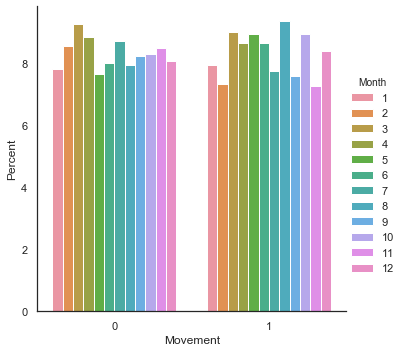

In [22]:
x='Movement'
y='Month'
(data_
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Percent',hue=y,kind='bar'))

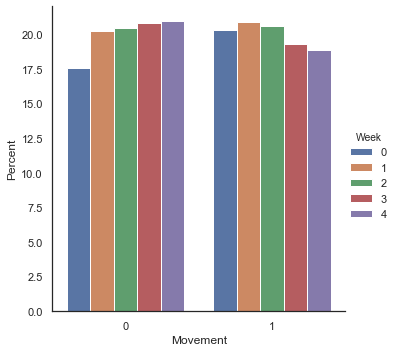

In [24]:
x='Movement'
y='Week'
(data_
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Percent',hue=y,kind='bar'))

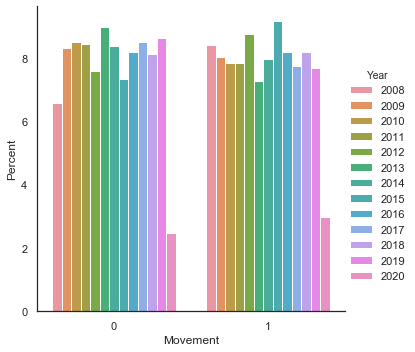

In [27]:
x='Movement'
y='Year'
(data_
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Percent',hue=y,kind='bar'))

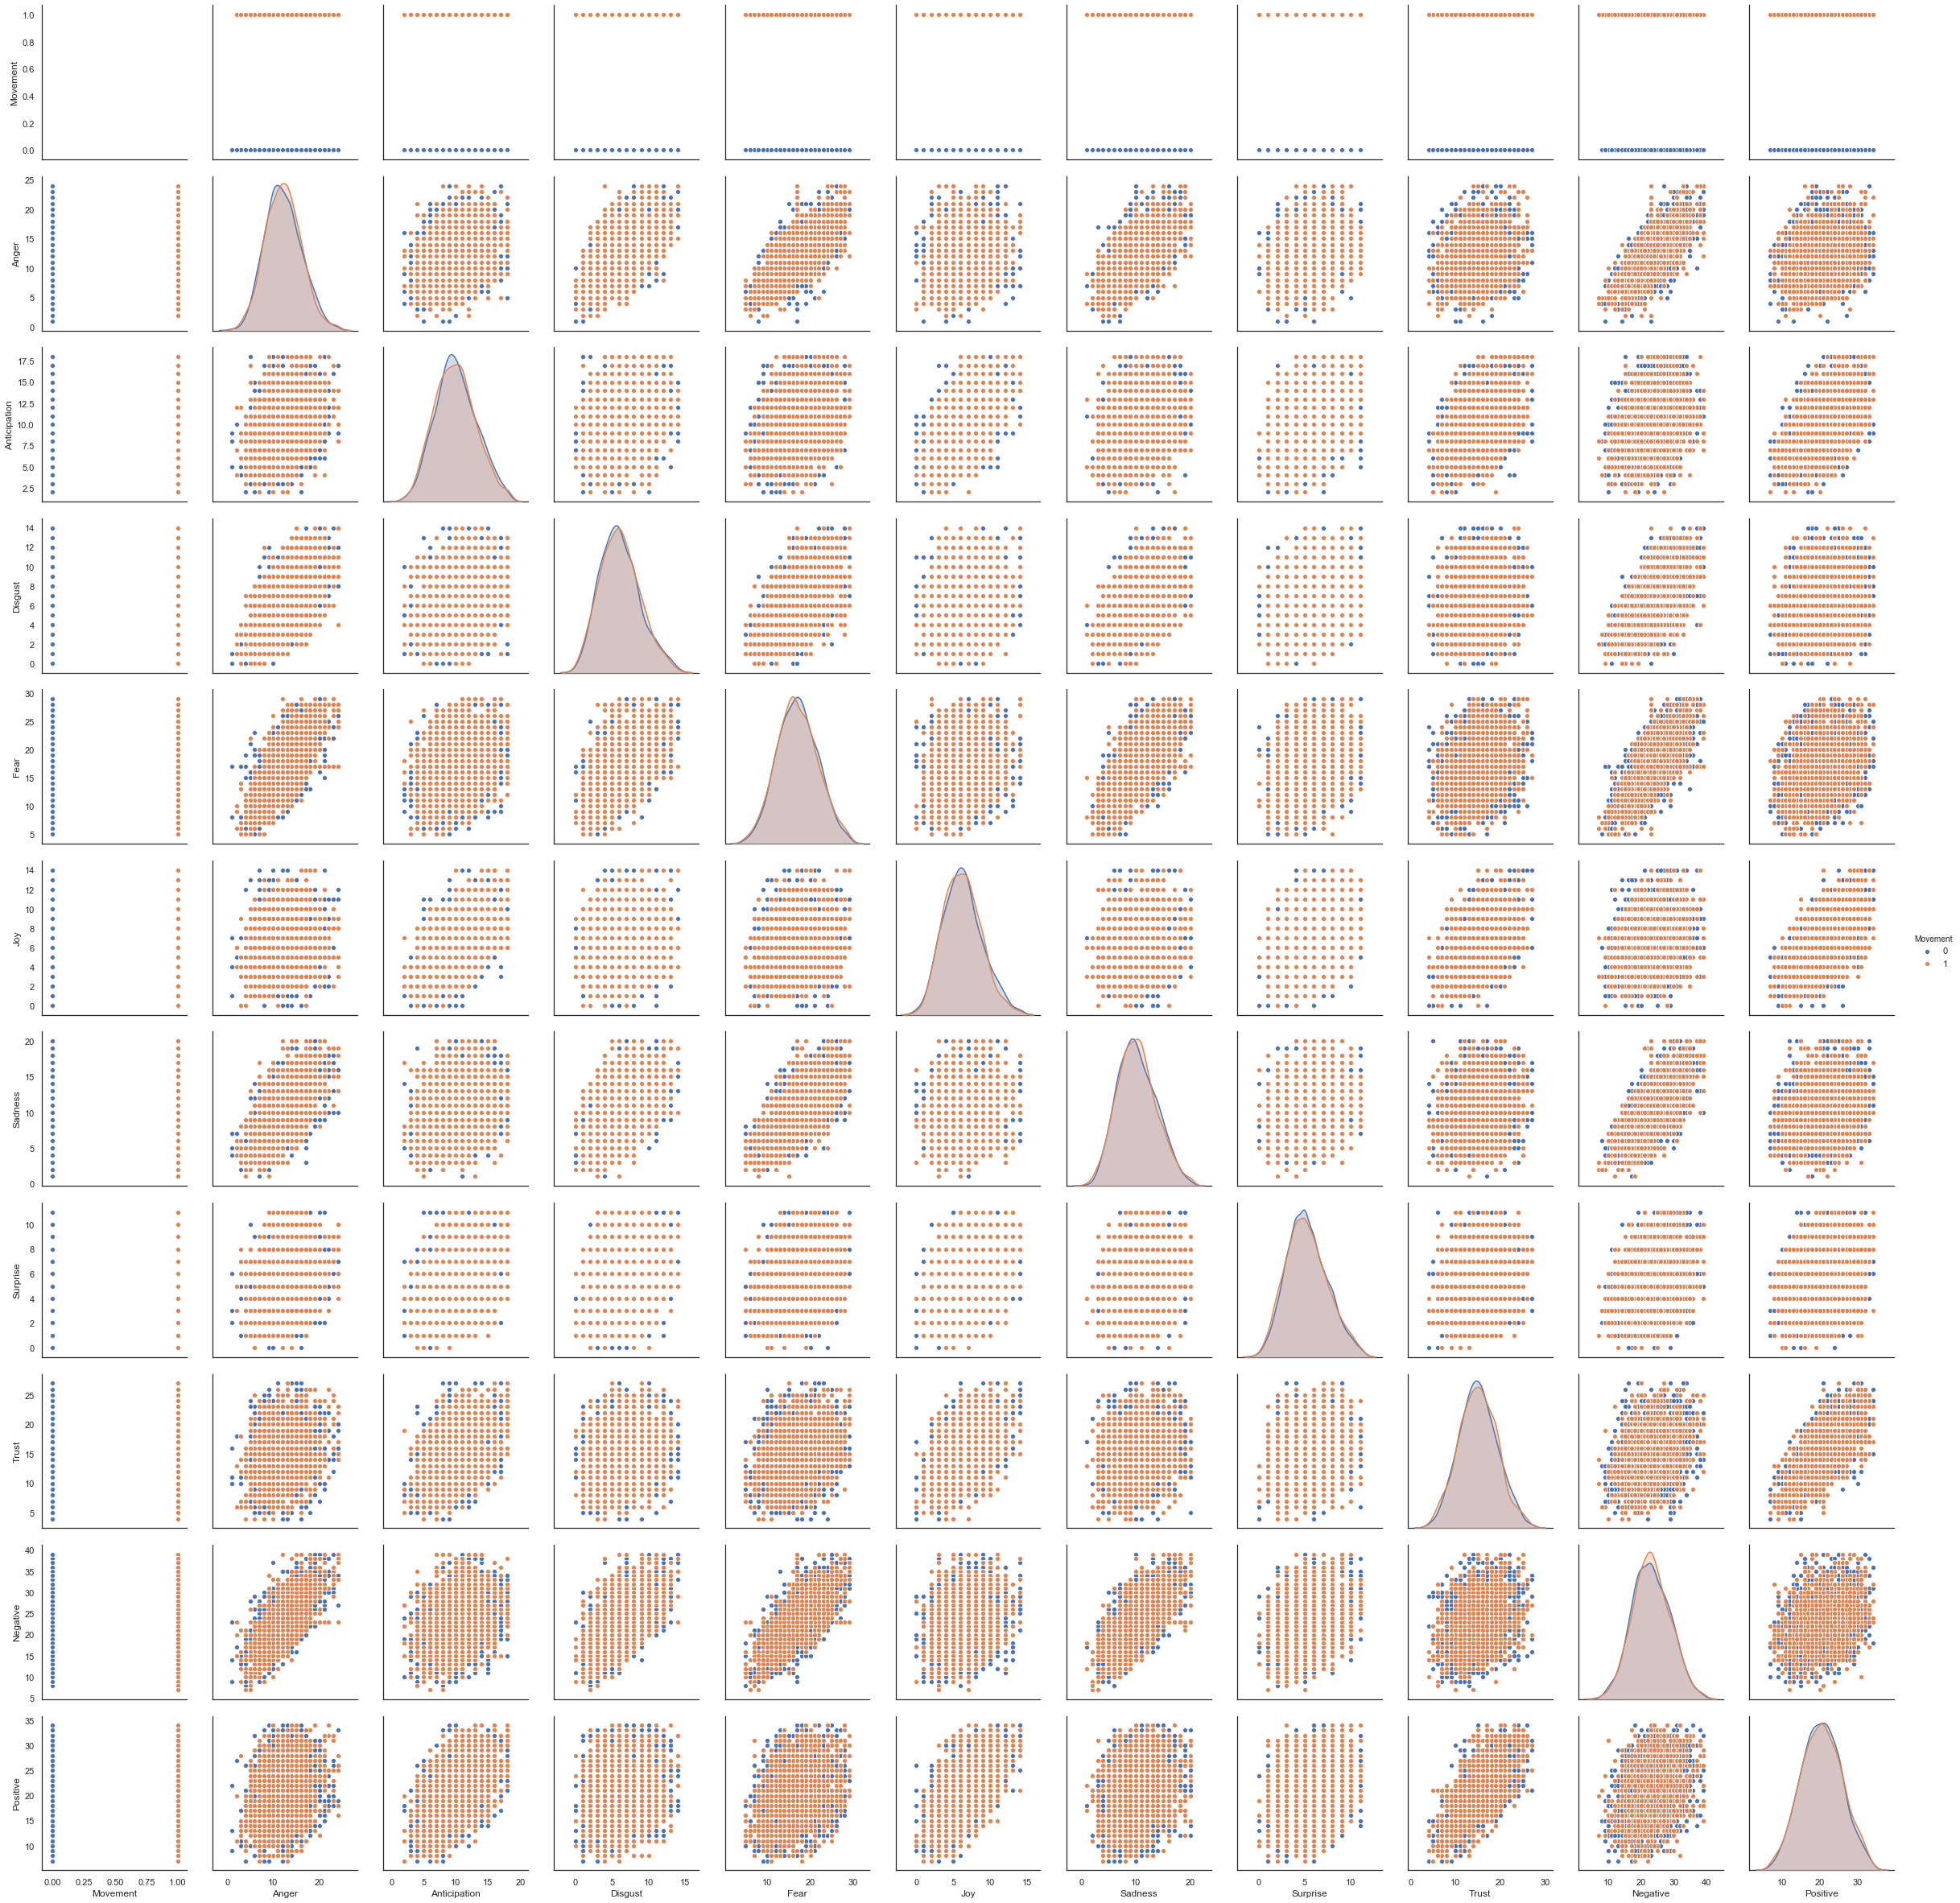

In [64]:
# Bivariate Pairwise relationships between columns
# The diagonal elements in a pairplot show the histogram by default (if diag_kind="kde" is deleted)
sns.pairplot(data_[['Movement','Anger','Anticipation','Disgust',\
                 'Fear','Joy','Sadness','Surprise','Trust','Negative','Positive']], hue="Movement", size=3, diag_kind="kde")

## 3. Data Analysis

In [59]:
variable_col = ['Year','Month','Week','Anger','Anticipation','Disgust',\
                 'Fear','Joy','Sadness','Surprise','Trust','Negative','Positive']

x = data_[variable_col]
y = data_['Movement']


In [52]:
#Before analysis, we create dummy variables for 'Year','Month', and 'Week'
ymw_dummy = pd.get_dummies(x, columns=['Year', 'Month','Week'], drop_first=True)
x = x.drop(columns=['Year','Month','Week'],axis=1)
x = pd.concat([x, ymw_dummy],axis=1)

In [47]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_array = scaler.fit_transform(x.values)
x = pd.DataFrame(x_array, index=x.index, columns=x.columns)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

models = []
models.append(('LR' , LogisticRegression()))
models.append(('LDA' , LinearDiscriminantAnalysis()))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('DdecisionTreeClassifier' , DecisionTreeClassifier()))
models.append(('NB' , GaussianNB()))
models.append(('SVM' , SVC()))
models.append(('RF' , RandomForestClassifier()))

results = []
names = []

for name, model in models:
    clf = model
    scores = cross_val_score(clf, x, y, cv=5)
    print(name + "'s Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

LR's Accuracy: 0.48 (+/- 0.04)
LDA's Accuracy: 0.50 (+/- 0.06)
KNN's Accuracy: 0.49 (+/- 0.02)
DdecisionTreeClassifier's Accuracy: 0.51 (+/- 0.05)
NB's Accuracy: 0.49 (+/- 0.07)
SVM's Accuracy: 0.50 (+/- 0.02)
RF's Accuracy: 0.51 (+/- 0.03)


In [62]:
#Without Year, Month, Week
variable_col = ['Anger','Anticipation','Disgust',\
                 'Fear','Joy','Sadness','Surprise','Trust','Negative','Positive']

x = data_[variable_col]
y = data_['Movement']

models = []
models.append(('LR' , LogisticRegression()))
models.append(('LDA' , LinearDiscriminantAnalysis()))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('DdecisionTreeClassifier' , DecisionTreeClassifier()))
models.append(('NB' , GaussianNB()))
models.append(('SVM' , SVC()))
models.append(('RF' , RandomForestClassifier()))

results = []
names = []

for name, model in models:
    clf = model
    scores = cross_val_score(clf, x, y, cv=5)
    print(name + "'s Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

LR's Accuracy: 0.52 (+/- 0.03)
LDA's Accuracy: 0.52 (+/- 0.03)
KNN's Accuracy: 0.50 (+/- 0.04)
DdecisionTreeClassifier's Accuracy: 0.51 (+/- 0.01)
NB's Accuracy: 0.52 (+/- 0.02)
SVM's Accuracy: 0.53 (+/- 0.03)
RF's Accuracy: 0.51 (+/- 0.01)
